## Bivariate Analysis

In [12]:
import pandas as pd
import seaborn as sns
from scipy import stats
sns.set_style()
sns.set(rc={'figure.figsize':(16,12)})

In [3]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### categorical vs categorical

In [13]:
titanic_stacked_df = titanic_df.groupby(['embark_town', 'class']).survived.count().unstack('class')
titanic_stacked_df

class,First,Second,Third
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


In [17]:
chi, p, dof, exp = stats.chi2_contingency(titanic_stacked_df, correction=True)

In [21]:
print('the expected values if no bias was present')
pd.DataFrame(exp, index=titanic_stacked_df.index, columns= titanic_stacked_df.columns)

the expected values if no bias was present


class,First,Second,Third
embark_town,,,
Cherbourg,40.440945,34.771654,92.787402
Queenstown,18.535433,15.937008,42.527559
Southampton,155.023622,133.291339,355.685039


In [22]:
p

8.435267819894384e-26

In [25]:
titanic_survived_stacked_df = titanic_df.groupby(['embark_town', 'class']).survived.sum().unstack('class')/titanic_stacked_df
titanic_survived_stacked_df.head()

class,First,Second,Third
embark_town,,,
Cherbourg,0.694118,0.529412,0.378788
Queenstown,0.500000,0.666667,0.375000
Southampton,0.582677,0.463415,0.189802


In [26]:
chi, p, dof, exp = stats.chi2_contingency(titanic_survived_stacked_df, correction=True)

In [29]:
p

0.9989353452702686

In [30]:
print('the expected values if no bias was present')
pd.DataFrame(exp, index=titanic_stacked_df.index, columns= titanic_stacked_df.columns)

the expected values if no bias was present


class,First,Second,Third
embark_town,,,
Cherbourg,0.650016,0.607102,0.345199
Queenstown,0.625411,0.584123,0.332133
Southampton,0.501368,0.468268,0.266258


### categorical vs numerical

In [36]:
t, p = stats.ttest_ind(
    titanic_df.fare[titanic_df.who=='man'],
    titanic_df.fare[titanic_df.who=='woman']
)
t, p

(-5.817465335062089, 8.614583735152227e-09)

In [38]:
titanic_df.fare[titanic_df.who=='man'].mean()

24.864181750465548

In [42]:
titanic_df.fare[titanic_df.who=='woman'].mean()

46.570711070110704

In [44]:
titanic_df.groupby(['who', 'class']).fare.mean().unstack('class')

class,First,Second,Third
who,,,
child,139.382633,28.323905,23.220190
man,65.951086,19.054124,11.340213
woman,104.317995,20.868624,15.354351


In [45]:
titanic_df.groupby(['who', 'class']).fare.count().unstack('class')

class,First,Second,Third
who,,,
child,6,19,58
man,119,99,319
woman,91,66,114


In [49]:
F, p = stats.f_oneway(
    titanic_df.fare[titanic_df.pclass==1],
    titanic_df.fare[titanic_df.pclass==2],
    titanic_df.fare[titanic_df.pclass==3]
)
F, p

(242.34415651744814, 1.0313763209141171e-84)

In [53]:
F, p = stats.f_oneway(
    titanic_df.age[titanic_df.pclass==1].dropna(),
    titanic_df.age[titanic_df.pclass==2].dropna(),
    titanic_df.age[titanic_df.pclass==3].dropna()
)
F, p

(57.443484340676214, 7.487984171959904e-24)

In [55]:
titanic_df.groupby('pclass').age.mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [56]:
titanic_df.groupby('survived').age.mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

can you find out if the age was relevant for survival?

### continuous vs continuous

In [60]:
stats.spearmanr(a=titanic_df[['age','fare']].dropna())

SpearmanrResult(correlation=0.1350512177342878, pvalue=0.00029580903243060916)

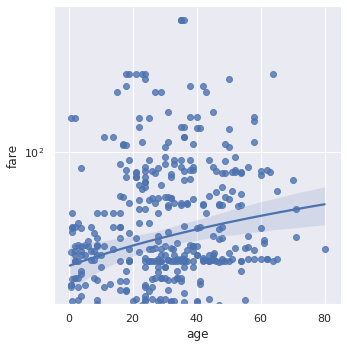

In [64]:
ax = sns.lmplot(data=titanic_df, x='age', y='fare')
ax.set(yscale='log')